In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 1500
dates = pd.date_range("2025-01-01", "2025-12-31", freq="D")

products = ["Espresso Beans", "Green Tea", "Chocolate Bar", "Protein Shake",
            "Granola", "Olive Oil", "Pasta", "Honey", "Almonds", "Soap"]

categories = {
    "Espresso Beans": "Beverages",
    "Green Tea": "Beverages",
    "Chocolate Bar": "Snacks",
    "Protein Shake": "Snacks",
    "Granola": "Snacks",
    "Olive Oil": "Grocery",
    "Pasta": "Grocery",
    "Honey": "Grocery",
    "Almonds": "Grocery",
    "Soap": "Household"
}

prices = {
    "Espresso Beans": 12.99,
    "Green Tea": 6.49,
    "Chocolate Bar": 1.99,
    "Protein Shake": 3.49,
    "Granola": 4.29,
    "Olive Oil": 9.99,
    "Pasta": 2.49,
    "Honey": 7.99,
    "Almonds": 5.99,
    "Soap": 2.99
}

df = pd.DataFrame({
    "order_id": range(10001, 10001 + n),
    "order_date": np.random.choice(dates, n),
    "customer_id": np.random.randint(2000, 2600, n),
    "product": np.random.choice(products, n),
    "quantity": np.random.randint(1, 6, n)
})

df["category"] = df["product"].map(categories)
df["unit_price"] = df["product"].map(prices)
df["net_sales"] = df["unit_price"] * df["quantity"]

df.to_csv("data/sample_sales.csv", index=False)

df.head()


,order_id,order_date,customer_id,product,quantity,category,unit_price,net_sales
0,10001,2025-04-13,2273,Honey,4,Grocery,7.99,31.96
1,10002,2025-12-15,2415,Almonds,1,Grocery,5.99,5.99
2,10003,2025-09-28,2038,Olive Oil,3,Grocery,9.99,29.97
3,10004,2025-04-17,2028,Granola,2,Snacks,4.29,8.58
4,10005,2025-03-13,2476,Olive Oil,4,Grocery,9.99,39.96


In [3]:
import pandas as pd

df = pd.read_csv("data/sample_sales.csv")
df.head()


,order_id,order_date,customer_id,product,quantity,category,unit_price,net_sales
0,10001,2025-04-13,2273,Honey,4,Grocery,7.99,31.96
1,10002,2025-12-15,2415,Almonds,1,Grocery,5.99,5.99
2,10003,2025-09-28,2038,Olive Oil,3,Grocery,9.99,29.97
3,10004,2025-04-17,2028,Granola,2,Snacks,4.29,8.58
4,10005,2025-03-13,2476,Olive Oil,4,Grocery,9.99,39.96


In [4]:
df["order_date"] = pd.to_datetime(df["order_date"])

df["year"] = df["order_date"].dt.year
df["month"] = df["order_date"].dt.month
df["month_name"] = df["order_date"].dt.month_name()


In [5]:
total_revenue = df["net_sales"].sum()
total_orders = df["order_id"].nunique()
total_customers = df["customer_id"].nunique()
avg_order_value = total_revenue / total_orders
total_units = df["quantity"].sum()

kpis = pd.DataFrame({
    "KPI": ["Total Revenue", "Total Orders", "Total Customers", "Avg Order Value (AOV)", "Total Units Sold"],
    "Value": [total_revenue, total_orders, total_customers, avg_order_value, total_units]
})

kpis


,KPI,Value
0,Total Revenue,27527.470000
1,Total Orders,1500.000000
2,Total Customers,543.000000
3,Avg Order Value (AOV),18.351647
4,Total Units Sold,4523.000000


In [6]:
kpis.style.format({
    "Value": "{:,.2f}"
})


,KPI,Value
0,Total Revenue,"27,527.47"
1,Total Orders,"1,500.00"
2,Total Customers,543.00
3,Avg Order Value (AOV),18.35
4,Total Units Sold,"4,523.00"


In [7]:
top_products = (
    df.groupby("product", as_index=False)["net_sales"]
      .sum()
      .sort_values("net_sales", ascending=False)
      .head(10)
)

top_products


,product,net_sales
2,Espresso Beans,6637.89
6,Olive Oil,5194.80
5,Honey,3851.18
4,Green Tea,2686.86
0,Almonds,2593.67
3,Granola,1818.96
8,Protein Shake,1507.68
9,Soap,1249.82
7,Pasta,1083.15
1,Chocolate Bar,903.46


In [8]:
rev_by_cat = (
    df.groupby("category", as_index=False)["net_sales"]
      .sum()
      .sort_values("net_sales", ascending=False)
)

rev_by_cat


,category,net_sales
1,Grocery,12722.80
0,Beverages,9324.75
3,Snacks,4230.10
2,Household,1249.82


In [9]:
kpis, top_products.head(3), rev_by_cat


(                     KPI         Value
 0          Total Revenue  27527.470000
 1           Total Orders   1500.000000
 2        Total Customers    543.000000
 3  Avg Order Value (AOV)     18.351647
 4       Total Units Sold   4523.000000,
           product  net_sales
 2  Espresso Beans    6637.89
 6       Olive Oil    5194.80
 5           Honey    3851.18,
     category  net_sales
 1    Grocery   12722.80
 0  Beverages    9324.75
 3     Snacks    4230.10
 2  Household    1249.82)

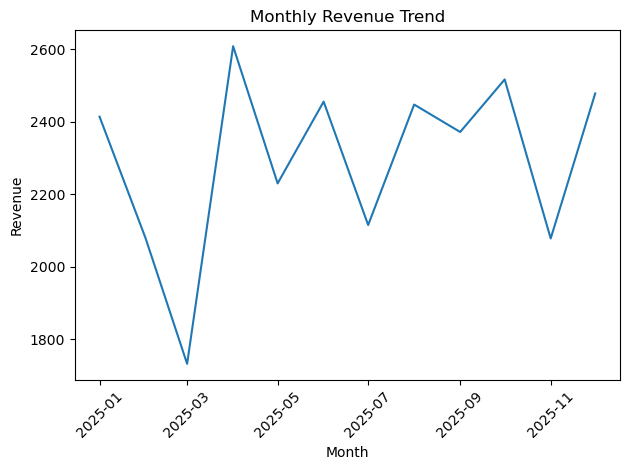

In [10]:
import matplotlib.pyplot as plt

monthly_revenue = (
    df.groupby(["year", "month"], as_index=False)["net_sales"]
      .sum()
)

# Create a proper datetime for plotting
monthly_revenue["date"] = pd.to_datetime(
    monthly_revenue["year"].astype(str) + "-" +
    monthly_revenue["month"].astype(str) + "-01"
)

plt.figure()
plt.plot(monthly_revenue["date"], monthly_revenue["net_sales"])
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


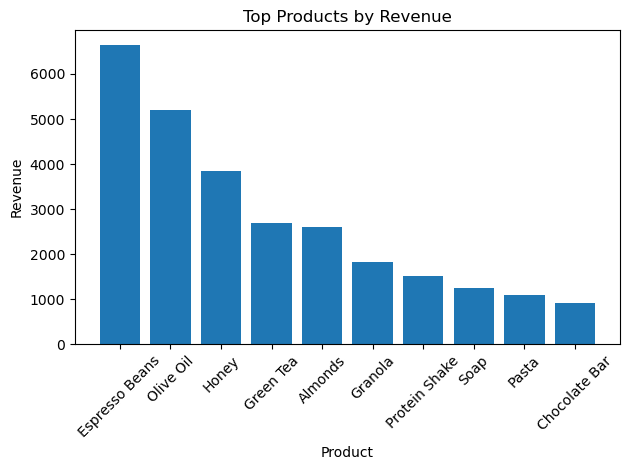

In [11]:
plt.figure()
plt.bar(top_products["product"], top_products["net_sales"])
plt.title("Top Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Key Insights

- Total revenue reached **€27.5K** across **1,500 orders**.
- Grocery products generate the highest revenue, followed by Beverages.
- Espresso Beans and Olive Oil are the top revenue-generating products.
- Average Order Value (AOV) is approximately **€18**, indicating mostly small basket sizes.
- Revenue is relatively stable across the year with moderate fluctuations.
